# Part II - Bike Sharing Data Exploration
## by Michael Muuwo Mutie

## Investigation Overview

The goal of this exploration was to establish what features contributed to the duration taked in bike rides. The features that were used in this exploration include user_type, age and gender. I created the age feature by subtracting the user's year of birth from 2022. A summary of the insights obtained is as listed below.
- our data set has more than thrice the number of male compared to female while a smaller fraction identified as other gender.
- Majority of the users were subscribers as compared to cutomers.
- most of the riders are currently aged between 30 to 40 years
- The younger riders took more time riding as compared to the older riders.
- we note that walk in customers took longer rides than registered subscribers.
- for those who identify as 'other gender', we have a spike of longer rides between age 50 to 60

## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The data set was downloaded from Udacity classroom. It contained 183412 rows and 16 columns before the exploration.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
rideData = pd.read_csv('201902-fordgobike-tripdata.csv')

In [5]:
copyRideData = rideData.copy() # first we make a copy of the dataFrame

 # next let us get rid of the 8265 rows with missing data
copyRideData = copyRideData.dropna(how = 'any', axis = 0)

# Convert bike_id from int to string
copyRideData['bike_id'] = copyRideData['bike_id'].astype(str)

# Convert bike_share_for_all_trip to boolean data type
copyRideData.bike_share_for_all_trip = (copyRideData.bike_share_for_all_trip == 'Yes')


# Create new column 'age' containing ages of the riders.
copyRideData['age'] = 2022 - copyRideData.member_birth_year


## (Visualization 1)
> There is a huge number of male riders compared to female riders as displayed below. There is also a small fraction of riders identified as 'other gender'
 

Text(0, 0.5, 'frequency')

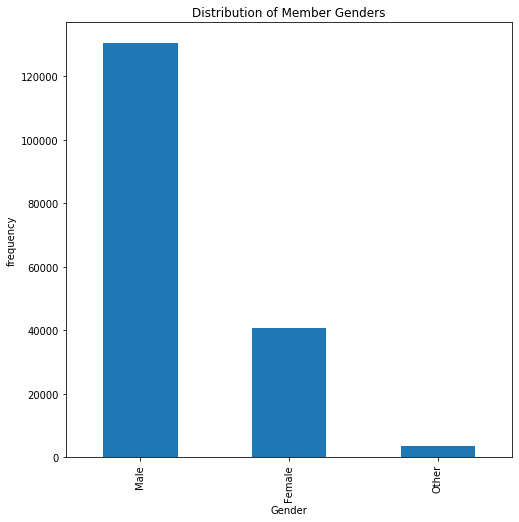

In [6]:
# using bar graph for visualization of the GENDER distribution
df1 = copyRideData['member_gender'].value_counts()
df1.plot(kind='bar',figsize=(8,8))
plt.title('Distribution of Member Genders')
plt.xlabel('Gender')
plt.ylabel('frequency')


## (Visualization 2)

> Most of the riders are currently aged between 30 to 40 years.

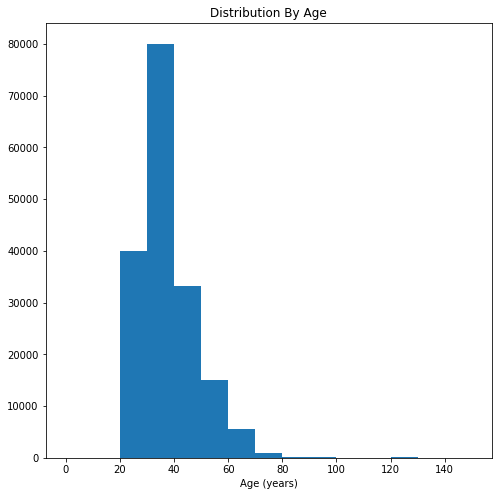

In [7]:
binsize = 10
bins = np.arange(0, copyRideData['age'].max()+binsize, binsize)

plt.figure(figsize=[8, 8])
plt.hist(data = copyRideData, x = 'age', bins = bins)
plt.title('Distribution By Age')
plt.xlabel('Age (years)')
plt.show()

## (Visualization 3)
younger riders are taking longer rides compared to older riders.



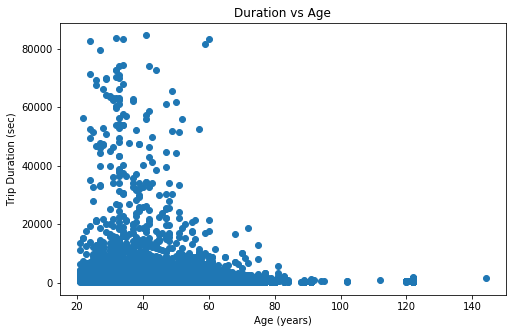

In [8]:
numeric_vars = ['duration_sec', 'age']

plt.figure(figsize=[8,5])
plt.scatter(data = copyRideData, x = 'age', y ='duration_sec', alpha= None)
plt.title('Duration vs Age')
plt.xlabel('Age (years)')
plt.ylabel('Trip Duration (sec)')
plt.show()

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [ ]:
!jupyter nbconvert <Part_II_Filename>.ipynb --to slides --post serve --no-input --no-prompt

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 